In [78]:
import numpy as np
import pandas as pd # only used for read data
import matplotlib.pyplot as plt # only used for plot

In [141]:
class multiLayterPercepton:
    def __init__(self, num_outputs, batch_size = 32, Learning_Rate = 0.0001,k = 10, n_Iteration = 200, num_hiddens = 128):
        self.num_outputs = num_outputs
        self.batch_size = batch_size
        self.Learning_Rate = Learning_Rate
        self.n_Iteration = n_Iteration
        self.num_hiddens = num_hiddens
        self.k = k
    
    def initParameters(self,X):
        self.num_features,self.num_observation  = X.shape[1],X.shape[0]
        self.W1 = np.random.randn(self.num_features, self.num_hiddens)*0.01
        self.b1 = np.random.randn(self.num_hiddens)
        self.W2 = np.random.randn(self.num_hiddens, self.num_outputs)*0.01
        self.b2 = np.random.randn(self.num_outputs)
        
    def net(self,X):
        self.Z1 = X@self.W1 +self.b1
        self.A1 = Relu(self.Z1)
        Z2 = self.A1@self.W2 +self.b2
        self.A2 = Softmax(Z2)
    
    def backPropagation(self,X,y):
        dZ2 = self.A2 - self.one_hot(y)
        dW2 = np.dot(self.A1.T,dZ2)/self.num_observation
        db2 = dZ2.mean(0)
        dZ1 = np.dot(dZ2, self.W2.T)*d_Relu(self.Z1)
        dW1 = np.dot(X.T, dZ1)/self.num_observation
        db1 = dZ1.mean(0)
        # Update
        self.W2 = self.W2 - self.Learning_Rate*dW2
        self.b2 = self.b2 - self.Learning_Rate*db2
        self.W1 = self.W1 - self.Learning_Rate*dW1
        self.b1 = self.b1 - self.Learning_Rate*db1
        
    def train(self, X_train, y_train, X_test, y_test):
        self.initParameters(X_train)
        self.train_ls, self.test_ls = [],[]
        for i in range(self.n_Iteration):
            for X_b, y_b in data_iteration(self.batch_size,X_train,y_train):
                self.net(X_b)
                self.backPropagation(X_b, y_b)
            # record accuarcy
            self.net(X_train)
            Train_acc = get_accuracy(get_pred(self.A2),y_train)
            self.train_ls.append(Train_acc)
            if y_test is not None:
                self.net(X_test)
                test_acc = get_accuracy(get_pred(self.A2),y_test)
                self.test_ls.append(test_acc)

    def k_fold_train(self,X,y):
        self.train_ls_sum, self.valid_l_sum = 0, 0
        for i in range(self.k):
            data = cv_k_fold(self.k, i, X,y)
            self.train(*data)
            self.train_ls_sum += self.train_ls[-1]
            self.train_ls_sum += self.test_ls[-1]
            if i == 0:
                acc_plot(self.n_Iteration, self.train_ls, self.test_ls)
            print(f'fold{i+1}, training accuracy{float(self.train_ls[-1]):f},'
                 f'validating accuracy{float(self.test_ls[-1]):f}')
    ## one_hot
    def one_hot(self,y):
        one_hot_Y = np.zeros((y.size, self.num_outputs))
        one_hot_Y[np.arange(y.size),y] = 1
        return one_hot_Y

#other functions        
## activation functions
def Relu(X):
    a = np.zeros_like(X)
    return np.maximum(X,a)

def Tahn(X):
    return np.tanh(X)

def Sigmoid(X):
    return 1/(1+np.exp(-X))

def Softmax(X):
    X_exp = np.exp(X)
    return (X_exp/(np.sum(X_exp,1,keepdims=True)))

## derivative of activation functions
def d_Relu(x):
    return np.where(x >= 0, 1, 0)
## cross entropy
def crossEntropyLoss_2(one_hot_Y,y_hat):
    return (-(one_hot_Y*np.log(y_hat))).sum(1).mean()
## get prediction and accuracy
def get_pred(A1):
    return(np.argmax(A1,1))
def get_accuracy(pred,y):
    return np.sum(pred == y)/y.size
## data_iteration
def data_iteration(batchSize, X, y):
    n = len(y)
    index = list(range(n))
    np.random.shuffle(index)
    for i in range(0, n, batchSize):
        batch_index = index[i:min(n, i+batchSize)]
        yield X[batch_index], y[batch_index]
## cv K fold
def cv_k_fold(k,i,X,y):
    assert k>1
    foldSize = X.shape[0]//k
    X_Train, y_Train = None, None
    for m in range(k):
        idx = slice(m * foldSize, (m+1)*foldSize)
        X_p, y_p = X[idx,:],y[idx]
        if m == i:
            X_v, y_v = X_p, y_p
        elif X_Train is None:
            X_Train, y_Train = X_p, y_p
        else:
            X_Train = np.concatenate((X_Train,X_p), 0)
            y_Train = np.concatenate((y_Train,y_p), 0)
    return X_Train, y_Train, X_v, y_v

def acc_plot(nIteration, list1, list2):
    plt.plot(list(range(1,nIteration+1)), list1,label='train', linestyle='-')
    plt.plot(list(range(1,nIteration+1)), list2, label='valid', linestyle='--')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    # show the image
    plt.show()

In [88]:
data_tr = pd.read_csv("data/train.csv")
data_te = pd.read_csv("data/test.csv")

In [89]:
data_tr.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
data_tr.shape, data_te.shape

((42000, 785), (28000, 784))

In [91]:
X_train, y_train = np.array(data_tr)[:,1:], np.array(data_tr)[:,0]
X_test = np.array(data_te)

In [142]:
MLP = multiLayterPercepton(num_outputs=10, num_hiddens=64, 
                           batch_size = 256, Learning_Rate = 0.0003,n_Iteration=200)

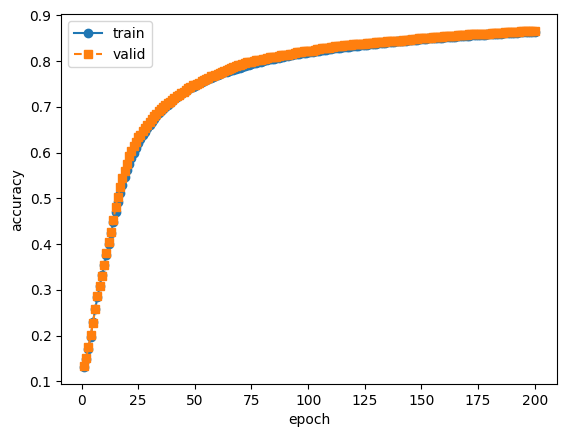

fold1, training accuracy0.864206,validating accuracy0.865952
fold2, training accuracy0.864921,validating accuracy0.863571
fold3, training accuracy0.868413,validating accuracy0.866190
fold4, training accuracy0.867672,validating accuracy0.859048
fold5, training accuracy0.860952,validating accuracy0.863333
fold6, training accuracy0.866455,validating accuracy0.863571


KeyboardInterrupt: 

In [143]:
MLP.k_fold_train(X_train, y_train)

In [103]:
MLP.train_ls_sum

1.727989417989418

In [18]:
MLP.net(X_test)
preds = get_pred(MLP.A2)

In [59]:
data_te['Label'] = pd.Series(preds.reshape(1,-1)[0])
data_te['ImageId'] = pd.Series(np.array(np.arange(1, data_te.shape[0] + 1, 1).reshape(1,-1)[0]))
submission = pd.concat([data_te['ImageId'], data_te['Label']], axis = 1)
submission.to_csv('submission.csv', index=False)

In [71]:
#scratch
def init_parameters():
    num_features, num_outputs = X_train.shape[1],10
    hiddenLayers = 128
    W1 = np.random.randn(num_features, hiddenLayers)*0.01
    b1 = np.random.randn(hiddenLayers)

    W2 = np.random.randn(hiddenLayers,num_outputs)*0.01
    b2 = np.random.randn(num_outputs)
    return W1,W2,b1,b2

In [72]:
def Relu(X):
    a = np.zeros_like(X)
    return np.maximum(X,a)

def Tahn(X):
    return np.tanh(X)

def Sigmoid(X):
    return 1/(1+np.exp(-X))

def Softmax(X):
    X_exp = np.exp(X)
    return (X_exp/(np.sum(X_exp,1,keepdims=True)))

In [73]:
def d_Relu(x):
    return np.where(x >= 0, 1, 0)

In [74]:
W1,W2,b1,b2 = init_parameters()
W1.shape,b1.shape,W2.shape,b2.shape

((784, 128), (128,), (128, 10), (10,))

In [75]:
def net(W1,W2,b1,b2,X):
    Z1 = X@W1+b1
    A1 = Relu(Z1)
    Z2 = A1@W2+b2
    A2 = Softmax(Z2)
    return (Z1, A1, A2)

In [76]:
def one_hot(y):
    one_hot_Y = np.zeros((y.size, y.max()+1))
    one_hot_Y[np.arange(y.size),y] = 1
    return one_hot_Y

In [77]:
def data_iteration(batchSize, X, y):
    n = len(y)
    index = list(range(n))
    np.random.shuffle(index)
    for i in range(0, n, batchSize):
        batch_index = index[i:min(n, i+batchSize)]
        yield X[batch_index], y[batch_index]

In [78]:
def crossEntropyLoss_2(one_hot_Y,y_hat):
    return (-(one_hot_Y*np.log(y_hat))).sum(1).mean()

In [79]:
def get_pred(A1):
    return(np.argmax(A1,1))
def get_accuracy(pred,y):
    print(pred,y)
    return np.sum(pred == y)/y.size

In [80]:
def backPropagation(W2, W1, b1, b2, A1, A2, Z1, X, y, lr):
    N = y.size
    one_hot_Y = one_hot(y)
    dZ2 = A2 - one_hot_Y
    dW2 = np.dot(A1.T, dZ2)/N
    db2 = dZ2.mean(0)
    dZ1 = np.dot(dZ2, W2.T)*d_Relu(Z1)
    dW1 = np.dot(X.T, dZ1)/N
    db1 = dZ1.mean(0)
    # update parameters
    W2 = W2 - lr * dW2
    b2 = b2- lr * db2
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1
    return W2, b2, W1, b1

In [81]:
def train(X,y,lr, nIteration):
    W1,W2, b1,b2 = init_parameters()
    one_hot_Y = one_hot(y)
    for i in range(nIteration):
        Z1, A1, A2 = net(W1,W2,b1,b2,X)
        W2, b2, W1, b1 = backPropagation(W2, W1, b1, b2, A1, A2, Z1, X, y, lr)
        if (i%20==0):
            print("n_Iteration:",i)
            print("Accuracy:",get_accuracy(get_pred(A2),y))
            print("crossEntropy", crossEntropyLoss_2(one_hot_Y,A2))
    return W1, b1, W2, b2

In [82]:
#train(X_train,y_train,0.0001, 100)

n_Iteration: 0
[0 4 0 ... 4 0 1] [1 0 1 ... 7 6 9]
Accuracy: 0.053976190476190476
crossEntropy 3.682227624687645
n_Iteration: 20
[2 5 1 ... 4 6 1] [1 0 1 ... 7 6 9]
Accuracy: 0.35219047619047616
crossEntropy 1.8897318200400044


KeyboardInterrupt: 